In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'Equites_Historical_Adjusted_Prices_Report.csv'
df = pd.read_csv(data_path)

# Load the dataset
data_path = 'Equites_Historical_Adjusted_Prices_Report.csv'
df = pd.read_csv(data_path)

symbols_to_delete = [2002, 3001, 4010, 8080, 8110, 4083, 4324, 6014, 8130, 8312]
df = df[~df['Symbol'].isin(symbols_to_delete)]

available_symbols = df['Symbol'].unique()


from tensorflow import keras
model = keras.models.load_model('stock_price_model.h5')

scalers = {}

def create_sequences(data, sequence_length):
    X = []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
    return np.array(X)

In [ ]:
def predict_next_day(data ,symbol, sequence_length=30):
    """
    Predicts the next day's closing price for a given stock symbol.

    Args:
        symbol: The stock symbol.
        sequence_length: The length of the input sequence for the model.

    Returns:
        The predicted closing price for the next day.
    """
    try:
        # Prepare the data
        close_prices = data['Close'].values.reshape(-1, 1)

        if len(close_prices) < sequence_length:
            print(f"Not enough data points for symbol {symbol} to create sequences")
            return None

        # Scale the data
        if symbol not in scalers:
            scalers[symbol] = MinMaxScaler(feature_range=(0, 1))
            scalers[symbol].fit(close_prices)

        scaled_data = scalers[symbol].transform(close_prices)
        X_test = create_sequences(scaled_data, sequence_length)

        # Make the prediction
        prediction = model.predict(np.array([X_test[-1]]))
        predicted_price = scalers[symbol].inverse_transform(prediction)[0][0]

        return predicted_price

    except Exception as e:
        print(f"An error occurred: {e}")
    #     return None

In [ ]:
def get_true_7_days(symbol):
    days = 30
    ticker = f"{symbol}.SR"
    stock_data = yf.Ticker(ticker)
    full_data = stock_data.history(period='3mo')
    data = full_data[:-days]
    true_values = full_data[-days:]['Close'].tolist()

    predections = []
    for i in range(days):
      predections.append(predict_next_day(data,symbol))
      data = full_data[:-days+i]
    return predections ,true_values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━

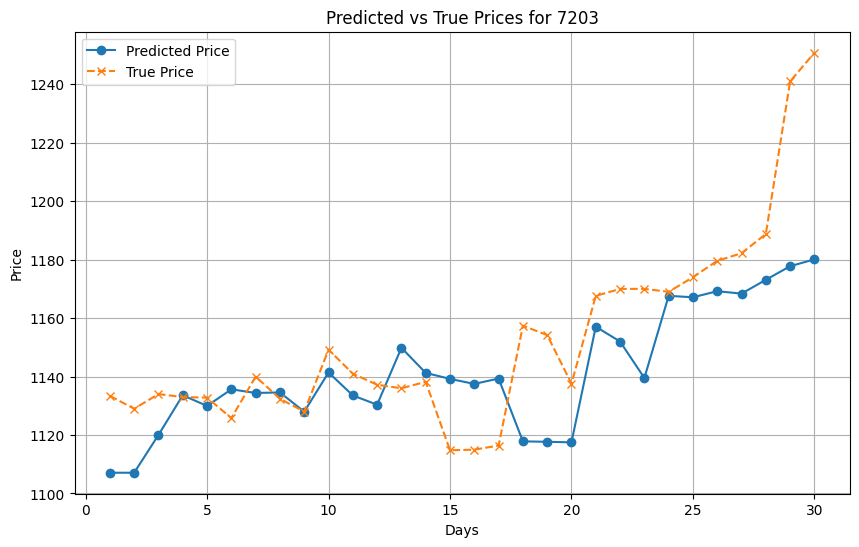

In [ ]:
symbol = 7203
predicted_price ,true_price = get_true_7_days(symbol)
import matplotlib.pyplot as plt

# Assuming predicted_price and true_price are lists of equal length
if predicted_price is not None and true_price is not None and len(predicted_price) == len(true_price):
    plt.figure(figsize=(10, 6))
    days = range(1, len(predicted_price) + 1)
    plt.plot(days, predicted_price, marker='o', linestyle='-', label='Predicted Price')
    plt.plot(days, true_price, marker='x', linestyle='--', label='True Price')
    plt.xlabel("Days")
    plt.ylabel('Price')
    plt.title(f"Predicted vs True Prices for {symbol}")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
  print("Error: Check if predictions are valid or lists are equal in length.")


In [ ]:
def calculate_loss(true_values, predicted_values):
    """Calculates the Mean Squared Error (MSE) loss between two sets of values.

    Args:
        true_values: A list or numpy array of true values.
        predicted_values: A list or numpy array of predicted values.

    Returns:
        The MSE loss as a float. Returns None if the inputs are invalid.
    """

    if not isinstance(true_values, (list, np.ndarray)) or not isinstance(predicted_values, (list, np.ndarray)):
        print("Error: Input values must be lists or numpy arrays.")
        return None

    if len(true_values) != len(predicted_values):
        print("Error: Input lists must have the same length.")
        return None

    true_values = np.array(true_values)
    predicted_values = np.array(predicted_values)

    mse = np.mean((true_values - predicted_values)**2)
    return mse

In [ ]:
results = []
for symbol in available_symbols:
    try:
        predicted_prices, true_prices = get_true_7_days(symbol)
        if predicted_prices is not None and true_prices is not None and len(predicted_prices) == len(true_prices):
            loss = calculate_loss(true_prices, predicted_prices)
            if loss is not None:
                results.append([symbol, loss])
        else:
            print(f"Skipping symbol {symbol} due to invalid predictions or unequal list lengths.")
    except Exception as e:
        print(f"An error occurred for symbol {symbol}: {e}")

results

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

[[1010, 0.3907897591535099],
 [1020, 0.13778643766502985],
 [1030, 0.06468376841197217],
 [1050, 0.08009032349352006],
 [1060, 0.6730749945150213],
 [1080, 0.15215919102338377],
 [1111, 7.980825859021085],
 [1120, 4.229085227162189],
 [1140, 0.8147524725985326],
 [1150, 0.2235695703770034],
 [1180, 0.43292946533086557],
 [1182, 0.05946233126157192],
 [1183, 0.2876534818135648],
 [1201, 0.04650417704760912],
 [1202, 0.8578381785254654],
 [1210, 0.3216269372956352],
 [1211, 1.732344897829171],
 [1212, 54.00021814624003],
 [1213, 4.074084452762812],
 [1214, 1.2495563731372386],
 [1301, 0.2880661641340945],
 [1302, 5.84538762888842],
 [1303, 0.03066896419109071],
 [1304, 2.5818687504695843],
 [1320, 2.9491616070314195],
 [1321, 7.370572584231073],
 [1322, 3.036878410158776],
 [1810, 0.08029785562527346],
 [1820, 0.0013618771412211572],
 [1830, 8.21877195040385],
 [1831, 0.07335675001274922],
 [1832, 0.0018119925890952497],
 [1833, 65.9172831749854],
 [1834, 0.02854478383752242],
 [2001, 0.

In [140]:
def normalized_mse_loss():
    """Calculates the normalized Mean Squared Error (MSE) loss.

    Args:
        true_values: A list or numpy array of true values.
        predicted_values: A list or numpy array of predicted values.

    Returns:
        The normalized MSE loss as a float.
    """
    days = 30
    results_df = pd.DataFrame(results, columns=['Symbol', 'Loss'])
    x = 0
    for i in results:
        symbol = results[x][0]
        ticker = f"{symbol}.SR"
        stock_data = yf.Ticker(ticker)
        full_data = stock_data.history(period='3mo')
        true_values = full_data[-days:]['Close'].tolist()
        mse = results[x][1]  # Using your existing calculate_loss function
        variance = np.var(true_values)
        normalized_mse = mse / variance
        x +=1
    return normalized_mse


# Example usage:
normalized_mse_loss()

0.5133639647228773

In [141]:
import numpy as np

def average_value_of_list(data):
    # Check if the input is a list or numpy array
    if not isinstance(data, (list, np.ndarray)):
        print("Error: Input must be a list or a NumPy array.")
        return None
    # Check if the list is empty
    if not data:
        print("Error: Input list cannot be empty.")
        return None
    # Check if all elements are numbers
    if not all(isinstance(x, (int, float)) for x in data):
        print("Error: All elements in the list must be numbers.")
        return None

    return np.mean(data)

# Example usage (replace with your actual list):
results_df = pd.DataFrame(results, columns=['Symbol', 'Loss'])
loss_result = results_df['Loss'].tolist()
avg = average_value_of_list(loss_result)
print(f"The average value is: {avg}")

# Find the row with the maximum loss
max_loss_row = results_df.loc[results_df['Loss'].idxmax()]

# Extract the symbol and maximum loss value
max_loss_symbol = max_loss_row['Symbol']
max_loss_value = max_loss_row['Loss']

print(f"The maximum loss value is: {max_loss_value} for {max_loss_symbol}" )

The average value is: 7.386812428621054
The maximum loss value is: 588.1849222545823 for 7203.0


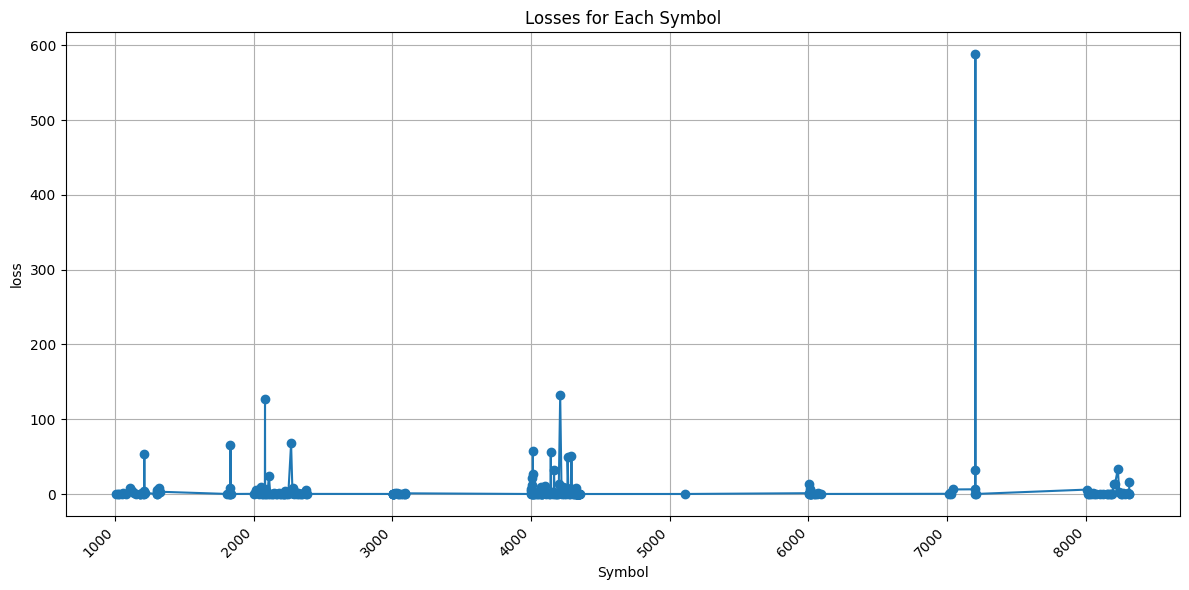

In [142]:
import matplotlib.pyplot as plt

# Assuming 'losses' and 'available_symbols' are defined as in your previous code
symbolsPlot = results_df['Symbol'].tolist()
lossPlot = results_df['Loss'].tolist()

if lossPlot and len(lossPlot) == len(symbolsPlot):
    plt.figure(figsize=(12, 6))
    plt.plot(symbolsPlot, lossPlot, marker='o', linestyle='-')
    plt.xlabel("Symbol")
    plt.ylabel("loss")
    plt.title("Losses for Each Symbol")
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.grid(True)
    plt.show()
else:
    print("Error: 'losses' and 'available_symbols' must have the same length and be non-empty.")